<a href="https://colab.research.google.com/github/AdityaRaj99/ML-Project/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

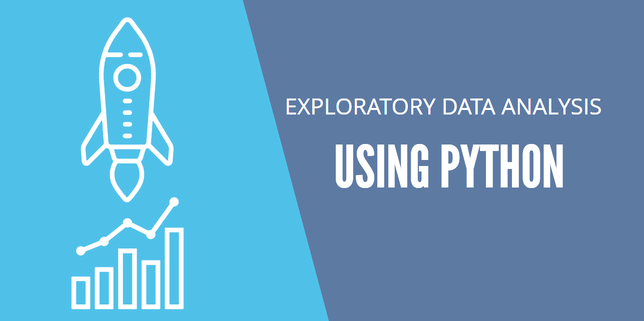

**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) in Python is the first step in your data analysis process developed by “John Tukey” in the 1970s. In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. By the name itself, we can get to know that it is a step in which we need to explore the data set. when you are trying to build a machine learning model you need to be pretty sure whether your data is making sense or not. The main aim of exploratory data analysis is to obtain confidence in your data to an extent where you’re ready to engage a machine learning algorithm.

**What data are we exploring today ?**

The data-set can be downloaded from https://www.kaggle.com/CooperUnion/cardataset. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this notebook, we will explore the data and make it ready for modeling.



#Step 1 - Importing required libraries

In [93]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

*Loading the required dataset*




In [94]:
df = pd.read_csv('/content/data.csv')
df.head(5)                #head is used here just to get a glimpse of data we have.

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


***Describing the types of  data and summary stats***

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.


In [95]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [96]:
#Identifying Shape
df.shape

(11914, 16)

In [97]:
# Identifying type of data (NAN values and Dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

#Step 2 - Dropping irrelevant columns

This step is certainly needed in EDA because sometimes there would be columns that we never use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type and Number of doors maynot be very relevant.

In [98]:
df = df.drop(['Engine Fuel Type','Market Category'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


#Step 3 - Renaming of colums 

Column renaming is the best practice to improve the data readability and solving confusion and not readable problems.

In [99]:
df = df.rename(columns = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             11914 non-null  object 
 1   Model            11914 non-null  object 
 2   Year             11914 non-null  int64  
 3   HP               11845 non-null  float64
 4   Cylinders        11884 non-null  float64
 5   Transmission     11914 non-null  object 
 6   Drive Mode       11914 non-null  object 
 7   Number of Doors  11908 non-null  float64
 8   Vehicle Size     11914 non-null  object 
 9   Vehicle Style    11914 non-null  object 
 10  MPG-H            11914 non-null  int64  
 11  MPG-C            11914 non-null  int64  
 12  Popularity       11914 non-null  int64  
 13  Price            11914 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.3+ MB


In [101]:
df.shape

(11914, 14)

#Step 4 - Dropping duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

In [102]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (791, 14)


We can see some duplicate rows and columns, so we will drop them now.

In [83]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [103]:
df.shape

(11914, 14)

**Dropping null & missing values**

Here all the missing values are detected and are dropped later. Now, this is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs. But the objective of this project is to do EDA and its fine to drop missing values and also the number of missing values is small compared to the entire dataset


In [104]:
print(df.isnull().sum())

Make                0
Model               0
Year                0
HP                 69
Cylinders          30
Transmission        0
Drive Mode          0
Number of Doors     6
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


Here, HP, Cylinders and Number of Doors have null values so we drop all null values now.

In [105]:
df = df.dropna()  
df.count()

Make               11815
Model              11815
Year               11815
HP                 11815
Cylinders          11815
Transmission       11815
Drive Mode         11815
Number of Doors    11815
Vehicle Size       11815
Vehicle Style      11815
MPG-H              11815
MPG-C              11815
Popularity         11815
Price              11815
dtype: int64

In [106]:
print(df.isnull().sum())

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Number of Doors    0
Vehicle Size       0
Vehicle Style      0
MPG-H              0
MPG-C              0
Popularity         0
Price              0
dtype: int64


No null values are left now.

#Step 5 - Checking for Outliers

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Here in all the plots, you can find some points are outside the box they are none other than outliers.

Boxplots are best and easy way to show outliers

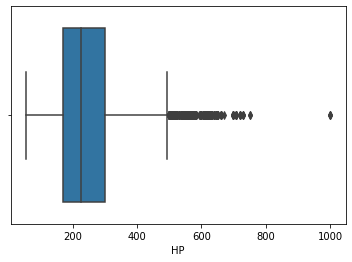

In [107]:
sns.boxplot(x=df['HP'])

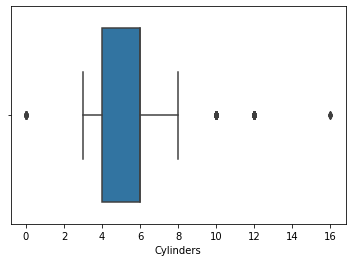

In [108]:
sns.boxplot(x=df['Cylinders'])

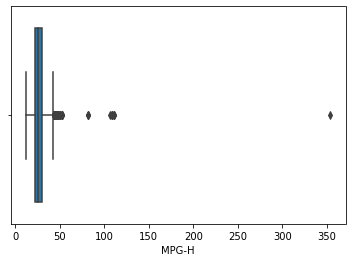

In [109]:
sns.boxplot(x=df['MPG-H'])

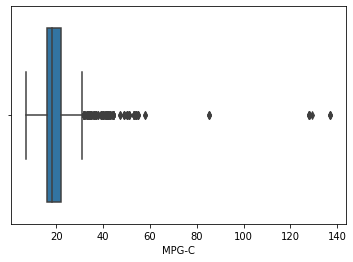

In [110]:
sns.boxplot(x=df['MPG-C'])

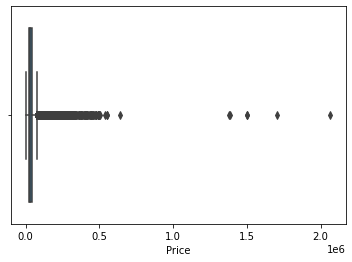

In [111]:
sns.boxplot(x=df['Price'])

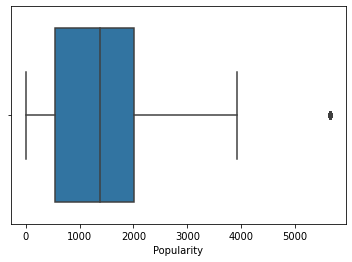

In [112]:
sns.boxplot(x=df['Popularity'])

**Finding IQR**

In [113]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.0
HP                   130.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21210.0
dtype: float64


**Removing of outliers**

In [114]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9054, 14)

#Step 6 - Plotting of Most Represented Car Brands

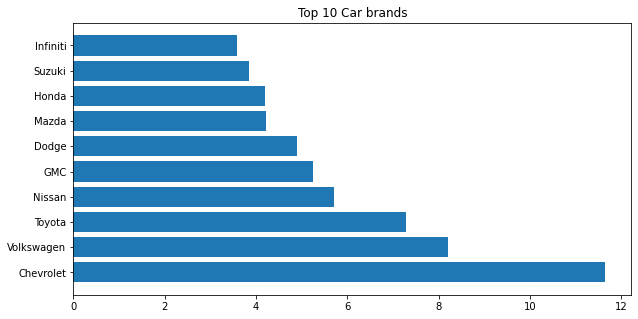

In [26]:
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plottting
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

**Average Pricing of popular cars**

In [115]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet') | (df['Make'] == 'Ford') | (df['Make'] == 'Volkswagen') | (df['Make'] == 'Toyota') |
               (df['Make'] == 'Dodge') | (df['Make'] == 'Nissan') | (df['Make'] == 'GMC') | (df['Make'] == 'Honda') |
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   27591.962049
Dodge       25983.345372
GMC         32866.520000
Honda       27511.286842
Mazda       20366.657963
Nissan      28148.655706
Toyota      29223.393020
Volkswagen  28339.133244


#Step 7 - Plotting of Correlation Matrix

In [116]:
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.331045,-0.103871,0.232874,0.362915,0.329151,0.202846,0.605823
HP,0.331045,1.000000,0.737088,0.061606,-0.467776,-0.562446,0.109508,0.740422
Cylinders,-0.103871,0.737088,1.000000,0.037353,-0.705080,-0.755770,0.030146,0.379489
Number of Doors,0.232874,0.061606,0.037353,1.000000,-0.004576,0.007790,-0.065683,0.141297
MPG-H,0.362915,-0.467776,-0.705080,-0.004576,1.000000,0.938825,0.072418,-0.121129
MPG-C,0.329151,-0.562446,-0.755770,0.007790,0.938825,1.000000,0.063520,-0.192756
Popularity,0.202846,0.109508,0.030146,-0.065683,0.072418,0.063520,1.000000,0.119780
Price,0.605823,0.740422,0.379489,0.141297,-0.121129,-0.192756,0.119780,1.000000


**So, from the correlation above we can say that:-**

=> **HP, Cylinders** shows **Highly Negative** correlation with **MPG-H and MPG-C** respectively.

=> **Price and HP** are **Positively** correlated with each other.

=> **Price and Year** are **Positively** correlated with each other.

=> **Cylinders and HP** are **Positively** correlated with each other.

=> **MPG-H and MPG-C** shows **Highly Positive** correlation with each other respectively.

#Step 8 - Exploratory Data Analysis

**Heatmap**

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator’s requirement.

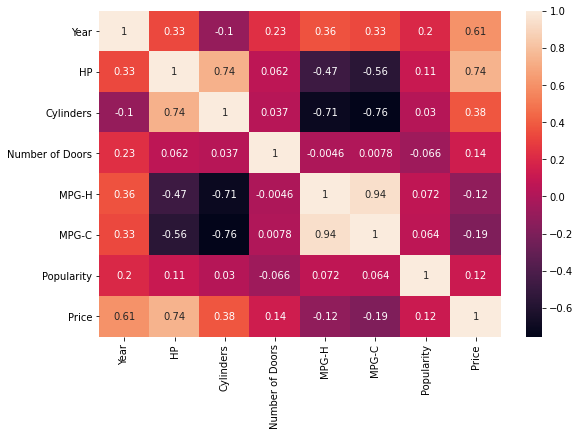

In [117]:
corrMatrix = df.corr()
plt.subplots(figsize=(9,6))
sns.heatmap(corrMatrix, annot=True)

**Scatterplot**

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

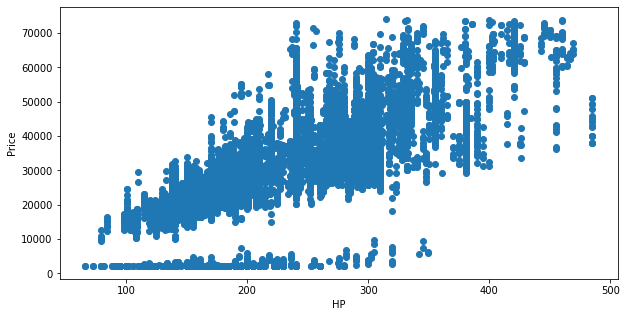

In [118]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel("Price")
plt.show()

From above scatterplot we can see that HP is increasing with the increasing price. So, more the price, more we'll be getting HP

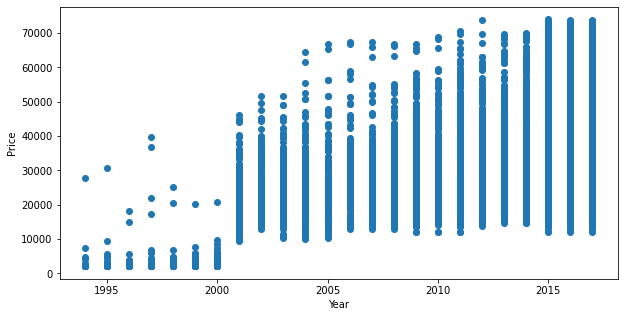

In [119]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Year'], df['Price'])
ax.set_xlabel('Year')
ax.set_ylabel("Price")
plt.show()

From the above scatterplot we can see that the Price is increasing with increasing Years. So, over the years due to inflation, car price are incresing.

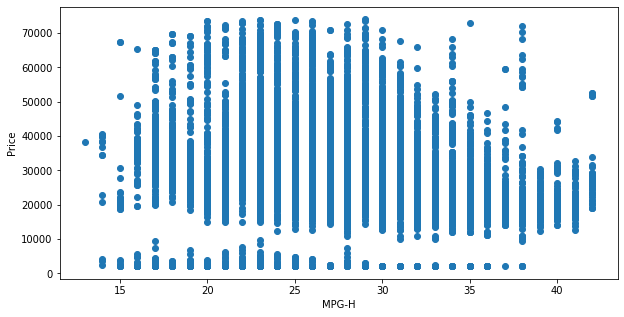

In [120]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['MPG-H'], df['Price'])
ax.set_xlabel('MPG-H')
ax.set_ylabel("Price")
plt.show()

From above scatterplot we can see that MPG-H is not showing any increasing or decreasing order but it's random with increasing price.

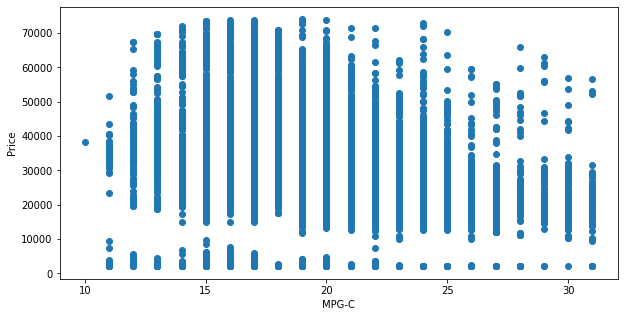

In [121]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['MPG-C'], df['Price'])
ax.set_xlabel('MPG-C')
ax.set_ylabel("Price")
plt.show()

From above scatterplot we can see that MPG-C is not showing any increasing or decreasing order but it's random with increasing price.

**Style of Vehicle which is sold the most**

Text(0.5, 0, 'Body Type')

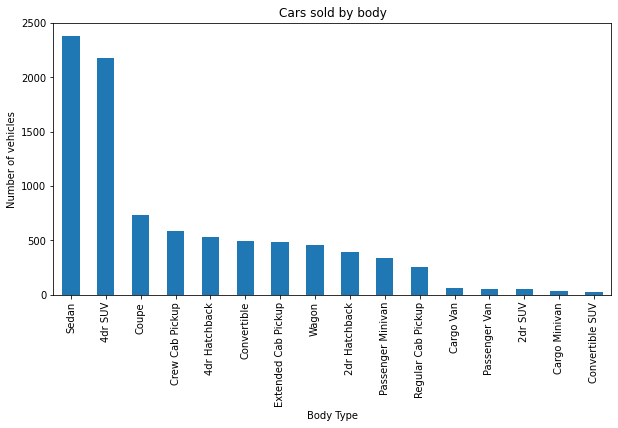

In [122]:
df['Vehicle Style'].value_counts().plot.bar(figsize = (10,5))
plt.title('Cars sold by body')
plt.ylabel('Number of vehicles')
plt.xlabel('Body Type')

So, from the above graph we can see that **Sedan** cars are the most sold cars and just below is the **4dr SUV** as the second most sold cars

Text(0.5, 0, 'Count of vehicles')

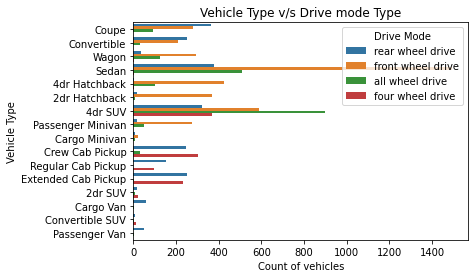

In [123]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

Making a New Group - 
**"Price_group"**

To show in which Price range people tends to buy most cars

In [124]:
# Create a new column 'Price_group' and assign the value based on car price
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

Text(0.5, 0, 'Price Group')

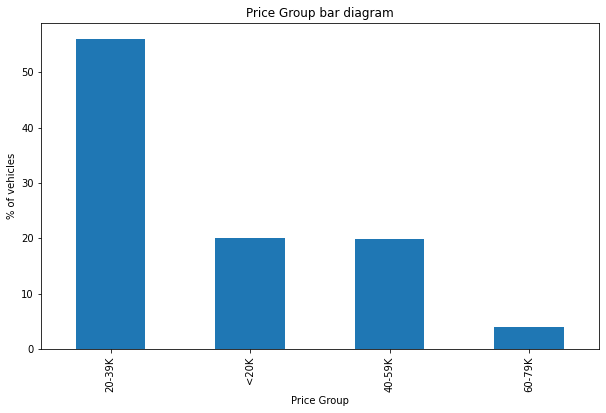

In [125]:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group')

*Label Encoding*

In [126]:
frame = df.select_dtypes(exclude=[np.number]).columns
frame

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style', 'price_group'],
      dtype='object')

*Label Encoding is going to be used here because* -

Label Encoding is used to convert the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [127]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
for i in frame:
  df[i]= label_encoder.fit_transform(df[i]) 
print('Label Encoded Data')
df.head()

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,price_group
0,3,1,2011,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135,1
1,3,0,2011,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650,1
2,3,0,2011,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350,0
3,3,0,2011,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450,0
4,3,0,2011,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500,0


#Step 9 - Base ML Model

In [128]:
X = df[[ 'Year','HP', 'Cylinders' ,'Number of Doors', 'MPG-H', 'MPG-C','Popularity']].values
y = df['Price'].values

In [129]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [130]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

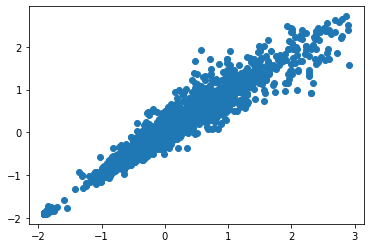

In [131]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

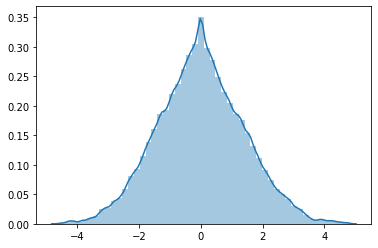

In [132]:
sns.distplot((y_test-y_pred),bins=50)

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.174100588784323
Root Mean Squared Error: 0.2525042312451653
R2 Score: 0.9363776395921843


So, by using Random Forest algorithm we can see that -
*   MAE Error value is very close to 0, so it's a good result.
*   RSM Error value is also very close to 0, so it's a good result.
*   R2 Error score is very close to 1 which is a good thing, so it's showing good result.    





*Also this will become the base model to see that if any model after this one will give any better results.*

#Step 10 - Checking results using different algorithms

*Linear Regression*

In [79]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

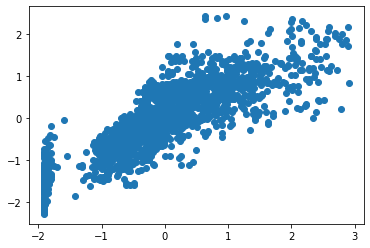

In [80]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

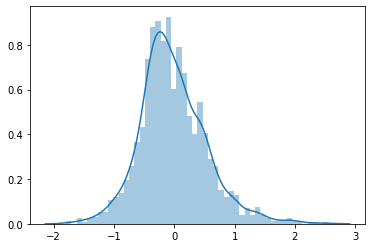

In [81]:
sns.distplot((y_test-y_pred),bins=50)

In [82]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4223824583397007
Root Mean Squared Error: 0.5501133406331579
R2 Score: 0.6980209521215629


So, Linear Regression algorithm results are showing less better results than our base algorithm, so the base algorithm is better than this algorithm. 

*Support Vector Machine*

In [83]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

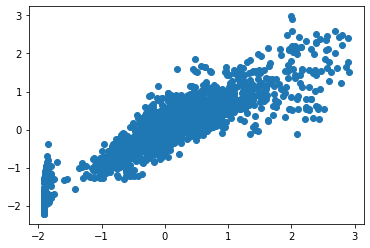

In [84]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

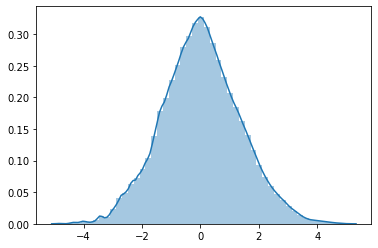

In [85]:
sns.distplot((y_test-y_pred),bins=50)

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.30299307030710637
Root Mean Squared Error: 0.4274562343364152
R2 Score: 0.8176709922533376


So, Support Vector Machine algorithm results are not showing better results than our base algorithm, so the base algo is better than this algorithm. 